# Final Project Submission
---

## Info

* Student name: **Barto Molina**
* Student pace: **part time**
* Scheduled project review date/time: **06/20/2019 4:30 PM (EST)**
* Instructor name: **Victor Geislinger**
* Blog post URL: 

## Imports

Load the required libraries that will be used throughout the rest of the project:

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset from [kc_house_data.csv](kc_house_data.csv):

In [164]:
df = pd.read_csv('kc_house_data.csv')

## Data / Project Summary

The column descriptions can be found in the [column_names.md](column_names.md) file.

Let's have a first look of the data by looking at the number of records, data types and the values of the first few rows of the dataset:

In [165]:
df.info()

# display all columns
pd.set_option('display.max_columns', 21)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Let's look at the first three columns of the data:

- id: unique identified for a house
- date: the date the house was sold
- price: this is our target variable


Let's find out what's the date range for the data and see if we can use the id column as the index for our dataset:

In [166]:
# date range
print(f"{df.date.max()} - {df.date.min()}")

9/9/2014 - 1/10/2015


In [167]:
# return the rows with a duplicated id (same property) and order by id
df[df.duplicated(['id'], keep=False)].sort_values(by='id').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,3,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,3,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,3,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,3,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,4,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956


**Observations**

- The dataset contains 21,597 rows which represent houses sold in King County (Washington) from September, 2014 to October, 2015. The [current population](https://suburbanstats.org/population/washington/how-many-people-live-in-king-county) (total number of houses in KC in 2019) is 789,232, and given that the population hasn't increased significantly from 2015 to 2019, we can assume that we're working with a sample of around 3% of the total number of properties in KC (although whether that's the total number of sales during that period is unknown).

- `price` is the target variable. From the set of variables, we'll try to identify those with a higher influence over the price, which we'll use to build our model.

- The `id` column identifies each house, and not a sale record. Hence this might be useful in order to fill in incomplete data (those features that will be necessarily equal) and use this feature to test the validity of the date as a predictor.

## 1. Data Scrubbing

### Data visualization / Null values

Before we start the data scrubbing process by dealing with null values and data types, let's have a quick look at the scatter plot and histogram for all the variables. This will help us identify correlations between our features, determine the skeweness and curtosis and point to possible outliers

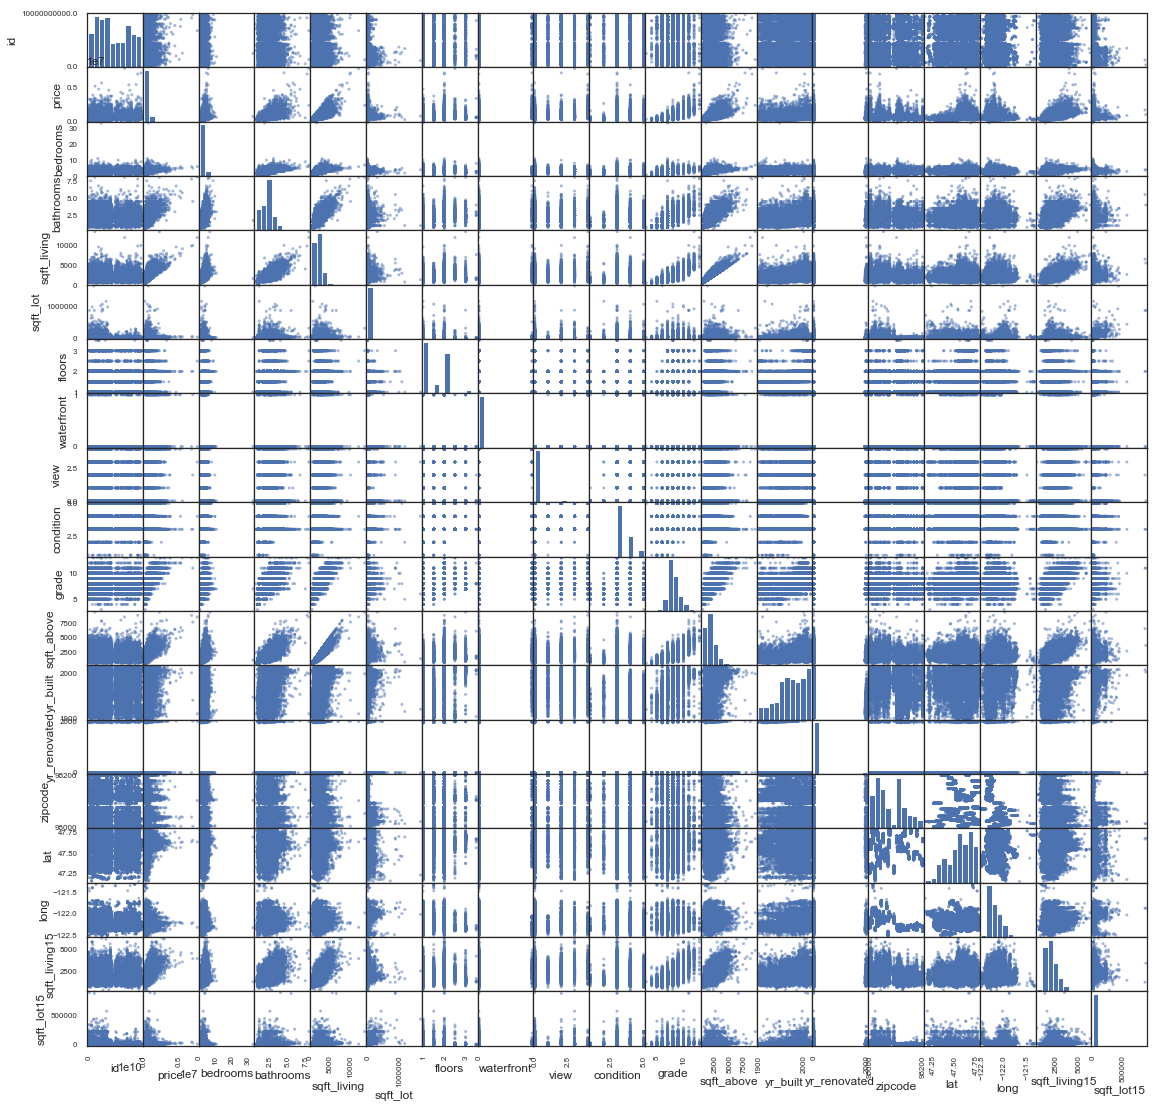

In [168]:
pd.plotting.scatter_matrix(df, figsize  = [19, 19]);

In [169]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [170]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**Observations**

1. Categorical data

From the scatter matrix above, we've identified the following features that can be considered as **categorical**:

- waterfront
- view
- condition
- grade

We'll consider `bedrooms` and `floors` as quantitative, assuming there's a mathematical relationship between the values on these columns, and will transform the rest of the columns into categories.

We'll also consider `zipcode` and the years (`yr_built` and `yr_renovated`) as categorical.

2. Null values

There are some columns with null values (`waterfront`, `view` and `yr_renovated`). For `waterfront` and `yr_renovated` this is number is relevant (around 10% of the data) and we'll need to decide how we handle them. As for the `view` column, we'll probably just drop those 63 records. We'll also need to look for placeholders.

3. Outliers and placeholders

From the summary table, we can note a couple of clear outliers on the max. values of the number of bedrooms (33) and the house footage / lot footage (13540 / 1651359) and a value of 0 in the `yr_renovated` which might be used as a placeholder

### Null values / placeholders and data types

After an initial exploration, we found that the `waterfront`, `view` and `yr_renovated` contain null values. Before dealing with them, we'll also check if there are values that may be used placeholders in any of the columns:

In [171]:
for column in df:
    print(column)
    print('-----------')
    print('describe:')
    print(df[column].describe())
    print('unique values:')
    print(df[column].unique())
    print('value counts:')
    print(df[column].value_counts(dropna = False).head())
    print('\n')

id
-----------
describe:
count    2.159700e+04
mean     4.580474e+09
std      2.876736e+09
min      1.000102e+06
25%      2.123049e+09
50%      3.904930e+09
75%      7.308900e+09
max      9.900000e+09
Name: id, dtype: float64
unique values:
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
value counts:
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date
-----------
describe:
count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object
unique values:
['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '1/15/2015' '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014'
 '10/7/2014' '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015'
 '5/14/2014' '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014'
 '6/26/2014' '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014'
 '6/13/2014' '12/30/2014' '2/13/2015' '6/20/2014' '7/15

Name: condition, dtype: int64


grade
-----------
describe:
count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64
unique values:
[ 7  6  8 11  9  5 10 12  4  3 13]
value counts:
7     8974
8     6065
9     2615
6     2038
10    1134
Name: grade, dtype: int64


sqft_above
-----------
describe:
count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64
unique values:
[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  9

Name: sqft_living15, dtype: float64
unique values:
[1340 1690 2720 1360 1800 4760 2238 1650 1780 2390 2210 1330 1370 2140
 1890 1610 1060 1280 1400 4110 2240 1220 2200 1030 1760 1860 1520 2630
 2580 1390 1460 1570 2020 1590 2160 1730 1290 2620 2470 2410 3625 1580
 3050 1228 2680  970 1190 1990 1410 1480 2730 1950 2250 2690 2960 2270
 2570 2500 1440 2750 2221 1010 3390 3530 1640 1510 2420 1940 3240 1680
  890 1130 3350 2350 1870 1720 1850 1900 1980 2520 1350 1750 1160 2550
 2370 1240 1270 2990 1380 1540 2090 2640 1830 1620 1880 2340 1710 2700
 3060 2660 1700 1970 1420 2060 2480 1550 1170 2820 1560 2230 2840 1450
 1500 3160 1200 3400 2110 2920 1770 1070 1930 3740 2260 1670 2290 1050
 2540 2190 2030 1230 2330 1300 1430 2770 1250 1630 2590 2130 1100 3836
 1320 2120 3070 1910 2080 1960 2280 1150 3430 2070 2600  830 1260 3120
 2010 1660 1600 2380 3890 4180 2653 2670 3920 2300 2310 2320 3150 1740
 2400 4550 2510 2440 2880 3860 2150 1310 1820 3080  880 2560 3470 1020
 2040 2610 1810 2860 3480 

The following columns contain null values / placeholders:
- `waterfront`: 'nan' (2376)
- `view`: 'nan' (63)
- `sqft_basement`: '?' (454)
- `yr_renovated`: '0.0' (17011), 'nan' (3842)

We'll deal with the null values / placeholders for each of the columns individually:

#### Waterfront

Let's have a look at the Waterfront column. From the `value_counts`, we can see that the majority of the houses are not waterfront. There are many null values compared to the number of the houses that are waterfront:

In [172]:
df.waterfront.value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

 We might assume that these houses are not waterfront but first, let's compare the price for all the categories with box plots:

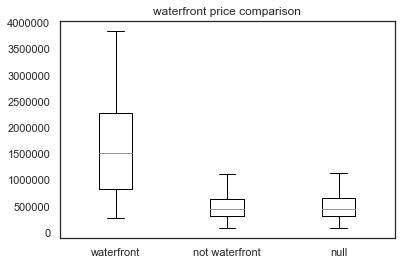

In [173]:
# show a box plot with the three categories of waterfront: 1, 0, null
wf_prices = []
wf_prices.append(df[df['waterfront'] == 1.0].price)
wf_prices.append(df[df['waterfront'] == 0.0].price)
wf_prices.append(df[df['waterfront'].isna()].price)

plt.title('waterfront price comparison')
plt.boxplot(wf_prices, labels=['waterfront', 'not waterfront', 'null'], showfliers=False);

Indeed, it seems that the price of the waterfront houses is higer than the one that are not facing the river. The null values seem to correspond to houses that are not facing the river.

In [174]:
# replace the null values in the waterfront column with '0'
df['waterfront'].fillna(0, inplace=True)

#### View

This column indicates if the house has been viewed. It's not clear what this column represents, but we'll assume that is the number of times a house has been viewed by a buyer before closing the transaction. Following a similar approach as with the `waterfront` column, we're going to see if theres any difference between the values in this column in relation with the price using box plots:

In [175]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

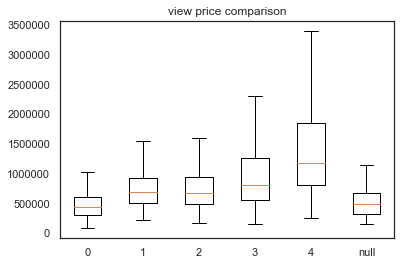

In [176]:
# show a box plot with the six categories of view: 0, 1, 2, 3, 4, null
vw_prices = []
vw_prices.append(df[df['view'] == 0.0].price)
vw_prices.append(df[df['view'] == 1.0].price)
vw_prices.append(df[df['view'] == 2.0].price)
vw_prices.append(df[df['view'] == 3.0].price)
vw_prices.append(df[df['view'] == 4.0].price)
vw_prices.append(df[df['view'].isna()].price)

plt.title('view price comparison')
plt.boxplot(vw_prices, labels=['0', '1', '2', '3', '4', 'null'], showfliers=False);

We can assume that the null values correspond to houses that have not been viewed.

In [177]:
# replace the null values in the waterfront column with '0'
df['view'].fillna(0, inplace=True)

#### Basement footage 

Let's investigate if there's any relationship between the different `square footage` columns:

In [178]:
# create a new dataframe that contains all the sqft related columns
cols = [col for col in df.columns if 'sqft' in col]
df_sqft = df[cols].copy()

df_sqft[df['sqft_basement'] != '?'].head(10)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1180,5650,1180,0.0,1340,5650
1,2570,7242,2170,400.0,1690,7639
2,770,10000,770,0.0,2720,8062
3,1960,5000,1050,910.0,1360,5000
4,1680,8080,1680,0.0,1800,7503
5,5420,101930,3890,1530.0,4760,101930
7,1060,9711,1060,0.0,1650,9711
8,1780,7470,1050,730.0,1780,8113
9,1890,6560,1890,0.0,2390,7570
10,3560,9796,1860,1700.0,2210,8925


It seems that the `sqft_basement` is actually the difference between the `sqft_living` and the `sqft_above` columns. Let's verify:

In [179]:
# all the houses with a basement
df_basement = df_sqft[df_sqft['sqft_basement'] != '?'].copy()

# create a calculated basement sqft column as sqft_living - sqft_above
df_basement['sqft_basement_calculated'] = df_basement['sqft_living'] - df_basement['sqft_above']

In [180]:
# convert the 'sqft_basement' column to int and check if the calculate values match the actual existing values
df_basement['sqft_basement'] = pd.to_numeric(df_basement['sqft_basement'], downcast='integer')

# compare calculated and actual values
(df_basement['sqft_basement'] == df_basement['sqft_basement_calculated']).all()

True

They match! For now, we'll just assume that the sqft_basement is just the difference between the `sqft_living` and the `sqft_above`. We'll convert the `sqft_basement` into int and then we'll fill in the nulls with the calculated value:

In [181]:
df['sqft_basement'].replace('?', np.nan, inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], downcast='integer')
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

We suspect that these columns will present some type of correlation and we'll need to drop some of them.

#### Year renovated

The `yr_renovated = 0` may indicate that the house has never been renovated, and we could assume that the null values also indicate that the house is not renovated. Same as with the `waterfront` and the `view` coulmns, let's inpect the relationship with the target value using box plots:

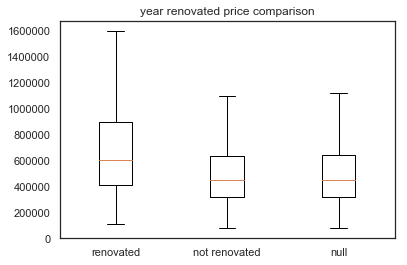

In [182]:
# show a box plot with the three categories of yr_renovated: 0, null, renovated
rn_prices = []
rn_prices.append(df[(df['yr_renovated'] != 0.0) & (df['yr_renovated'].notna())].price)
rn_prices.append(df[df['yr_renovated'] == 0.0].price)
rn_prices.append(df[df['yr_renovated'].isna()].price)

plt.title('year renovated price comparison')
plt.boxplot(rn_prices, labels=['renovated', 'not renovated', 'null'], showfliers=False);

Also in this case we can assume that both the null values and '0' correspond to houses that haven't been renovated, and we'll convert the '0' values into nulls:

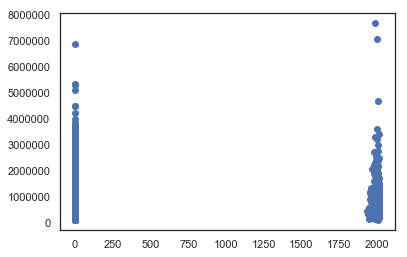

In [183]:
plt.scatter(df.yr_renovated, df.price);

In [184]:
# replace the null values in the yr_renovated column with '0'
df['yr_renovated'].replace(0, np.nan, inplace=True)

#### Future work

- Fill in data based on duplicated ids (as it's the same house)
- Analize the date column

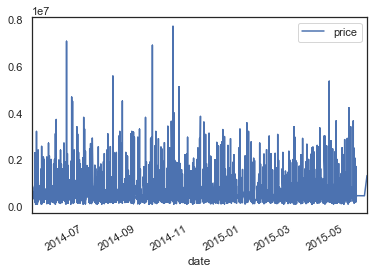

In [185]:
df['date'] = df['date'].astype('datetime64')
df.plot(x='date', y='price');

### Outliers

As discussed, we've identified some outliers in the `sqft_living` / `sqft_lot` and `bedrooms` columns. For now, we're going to remove the house with 33 bedrooms as it clearly seems related to an error during the data input:

In [186]:
df[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580,1947,NaN,98103,47.6878,-122.331,1330,4700


In [187]:
df = df[df.bedrooms != 33]

#### Future work

- investigate additional possible outliers: house footage / lot footage (13540 / 1651359 max)

### Multicollinearity

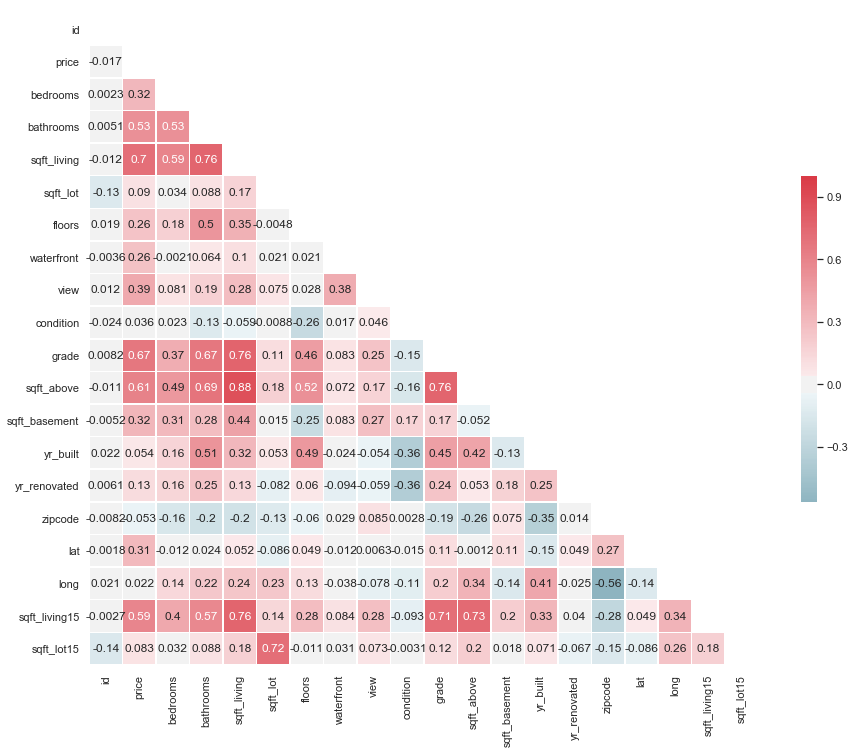

In [188]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, mask=mask, linewidths=.5, annot=True, cbar_kws={"shrink": .5});

From the heatmap above, it seems that there may be a high correlation between:
- `sqft_living` and `bathrooms`
- `sqft_living`, `sqft_above` and `sqft_living15`
- `sqft_lot` and `sqft_lot15`

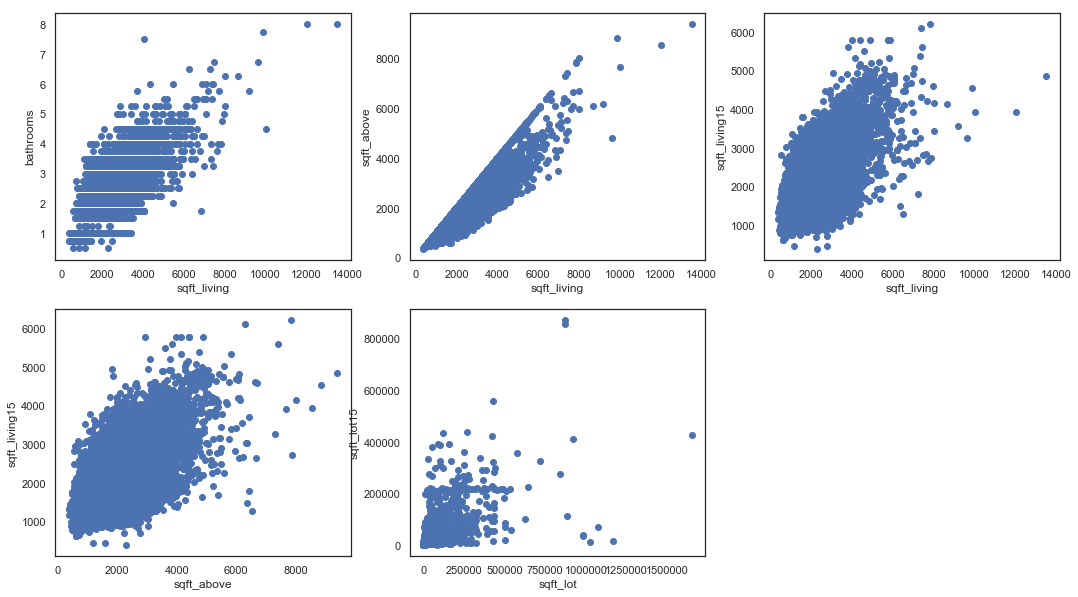

In [189]:
figure = plt.figure(figsize=(18, 10))
ax = figure.add_subplot(231)
ax2 = figure.add_subplot(232)
ax3 = figure.add_subplot(233)
ax4 = figure.add_subplot(234)
ax5 = figure.add_subplot(235)

ax.scatter(df['sqft_living'], df['bathrooms']);
ax.set_xlabel('sqft_living')
ax.set_ylabel('bathrooms')

ax2.scatter(df['sqft_living'], df['sqft_above']);
ax2.set_xlabel('sqft_living')
ax2.set_ylabel('sqft_above')

ax3.scatter(df['sqft_living'], df['sqft_living15']);
ax3.set_xlabel('sqft_living')
ax3.set_ylabel('sqft_living15')

ax4.scatter(df['sqft_above'], df['sqft_living15']);
ax4.set_xlabel('sqft_above')
ax4.set_ylabel('sqft_living15')

ax5.scatter(df['sqft_lot'], df['sqft_lot15']);
ax5.set_xlabel('sqft_lot')
ax5.set_ylabel('sqft_lot15')

plt.show()

As we suspected, there's a high correlation between the `sqft_living` and `sqft_above` columns. Also `sqft_living15` and `sqft_lot15` present some multicolliniarity. We're going to remove the following columns from our dataset:

We've decided to drop the `sqft_living` as it presents a high correlation with the rest of the columns. We'll also drop `sqft_living15` and `sqft_lot15`  which correlation with the target value is lower than the `sqft_above` and `sqft_lot` columns.

### Drop columns

Based on the investigations before, we're going to drop the following columns from the dataset:

- `id`, `date` and `view` as they won't provide relevant information for the model
- `sqft_living`, `sqft_living15` and `sqft_lot15` from the multicolliniarity test

In [190]:
df.drop(['id', 'date', 'view', 'sqft_living', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

### Normalization

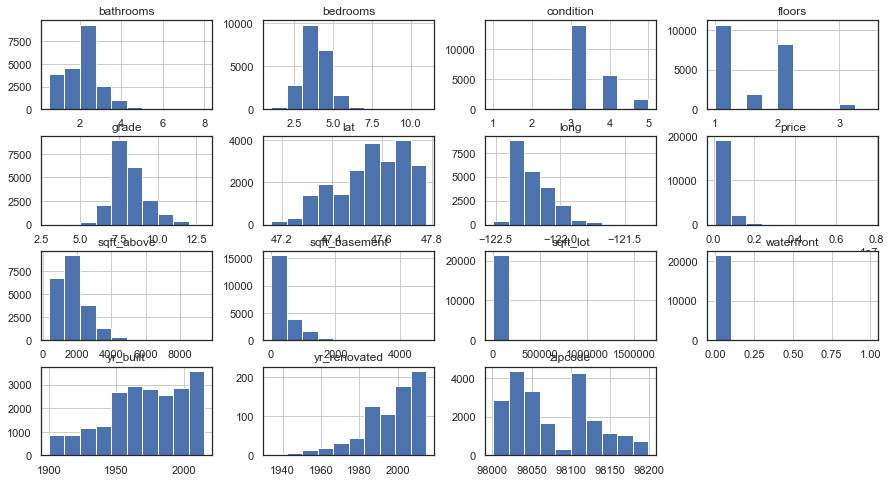

In [191]:
df.hist(figsize=(15,8));

Some columns present high positive skewness: `sqft_above`, `sqft_basement`, `sqft_lot` and the target variable `price`. We'll apply a log transformation to the former three for the time being:

In [192]:
#df['sqft_above'] = np.log(df['sqft_above'])
#df['sqft_basement'] = np.log(df['sqft_basement'])
#df['sqft_lot'] = np.log(df['sqft_lot'])

### Categorical features

As discussed before, the following columns will be converted into categories, so we'll transform them into strings:

In [193]:
df2 = df.copy()
for column in ['waterfront', 'condition', 'grade', 'yr_renovated', 'yr_built', 'zipcode']:
    df2[column] = df2[column].astype('str')

In [194]:
df2['condition'].describe()

count     21596
unique        5
top           3
freq      14020
Name: condition, dtype: object

### One-hot encoding

## 2. EDA (Exploratory Data Analysis)

## 3. Modeling

## 4. Interpretation